In [83]:
# import
import pandas as pd

In [84]:
# read in data
df = pd.read_csv("cleaned_cleveland2")
df.head()

,Age,Sex,cp,restbps,chol,fbs,rest ecg,thalac,exang,oldpeak,slope,ca,thal,num
0,63,1,1,145,233,1,2,150,0,2.3,3,0.0,6,0
1,67,1,4,160,286,0,2,108,1,1.5,2,3.0,3,1
2,67,1,4,120,229,0,2,129,1,2.6,2,2.0,7,1
3,37,1,3,130,250,0,0,187,0,3.5,3,0.0,3,0
4,41,0,2,130,204,0,2,172,0,1.4,1,0.0,3,0


In [85]:
from sklearn.model_selection import train_test_split
# separate into features and results
X = df.drop("num", axis=1)
y = df["num"]
# split into training and testing
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=27)
print(X_train.shape)
print(X_test.shape)

(242, 13)
(61, 13)


**try different feature selection algorithms and see what features are most commonly selected**

Feature: 0, Score: 0.081747
Feature: 1, Score: 0.018763
Feature: 2, Score: 0.141894
Feature: 3, Score: 0.051763
Feature: 4, Score: 0.070743
Feature: 5, Score: 0.010127
Feature: 6, Score: 0.026584
Feature: 7, Score: 0.087418
Feature: 8, Score: 0.024368
Feature: 9, Score: 0.078447
Feature: 10, Score: 0.021384
Feature: 11, Score: 0.105012
Feature: 12, Score: 0.281751


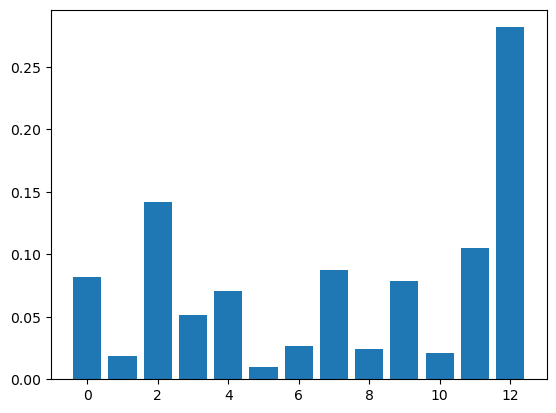

In [86]:
# decision tree for feature importance
from sklearn.datasets import make_classification
from sklearn.tree import DecisionTreeClassifier
from matplotlib import pyplot as pyplot
# define model
model = DecisionTreeClassifier()
# fit the model
model.fit(X, y)
# get importance
importance = model.feature_importances_
#summarize feature importance
for i, v in enumerate(importance):
    print("Feature: %0d, Score: %5f" % (i,v))
# plot feature importance
pyplot.bar([x for x in range(len(importance))], importance)
pyplot.show()
# top features: Age, cp, thalac, ca, thal

Feature: 0, Score: 0.087170
Feature: 1, Score: 0.031618
Feature: 2, Score: 0.131553
Feature: 3, Score: 0.073005
Feature: 4, Score: 0.080776
Feature: 5, Score: 0.013433
Feature: 6, Score: 0.019180
Feature: 7, Score: 0.108937
Feature: 8, Score: 0.055167
Feature: 9, Score: 0.111882
Feature: 10, Score: 0.051598
Feature: 11, Score: 0.127690
Feature: 12, Score: 0.107989


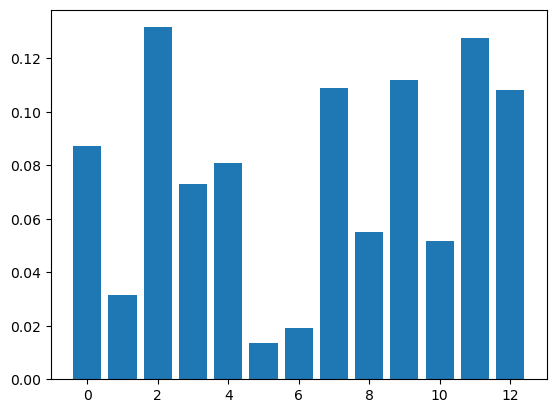

In [87]:
# random forest for feature importance
from sklearn.ensemble import RandomForestClassifier
# define model
model2 = RandomForestClassifier()
# fit the model
model2.fit(X,y)
# get importance
importance2 = model2.feature_importances_
#summarize feature importance
for i, v in enumerate(importance2):
    print("Feature: %0d, Score: %5f" % (i,v))
# plot feature importance
pyplot.bar([x for x in range(len(importance2))], importance2)
pyplot.show()
# top features: Cp, thalac, oldpeak, ca, thal

[00:11:56] WARNING: ../src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
Feature: 0, Score: 0.087170
Feature: 1, Score: 0.031618
Feature: 2, Score: 0.131553
Feature: 3, Score: 0.073005
Feature: 4, Score: 0.080776
Feature: 5, Score: 0.013433
Feature: 6, Score: 0.019180
Feature: 7, Score: 0.108937
Feature: 8, Score: 0.055167
Feature: 9, Score: 0.111882
Feature: 10, Score: 0.051598
Feature: 11, Score: 0.127690
Feature: 12, Score: 0.107989


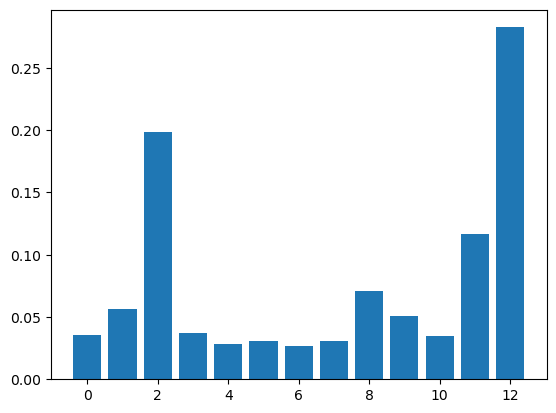

In [88]:
# xgboost for feature importance
from xgboost import XGBClassifier
# define model
model3 = XGBClassifier(use_label_encoder=False)
# fit model
model3.fit(X,y)
# get importance
importance3 = model3.feature_importances_
#summarize feature importance
for i, v in enumerate(importance2):
    print("Feature: %0d, Score: %5f" % (i,v))
# plot feature importance
pyplot.bar([x for x in range(len(importance3))], importance3)
pyplot.show()
# top features: cp, thalac, oldepeak, ca, thal

**Try different feature selection algorithms and see which ones result in the highest accuracy**

In [89]:
# evaluation of a model with all features present
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score
# fit the model
model = LogisticRegression(solver="liblinear")
model.fit(X_train, y_train)
# evaluate the model
yhat = model.predict(X_test)
#evaluate predictions
accuracy = accuracy_score(y_test, yhat)
print("Accuracy: %2f" % (accuracy*100))

Accuracy: 85.245902


In [90]:
# random forest 
# configure to select a subset of features
from sklearn.feature_selection import SelectFromModel
fs = SelectFromModel(RandomForestClassifier(n_estimators=200), max_features=5)
# learn relationship from training data
fs.fit(X_train, y_train)
# transform train input data
X_train_fs = fs.transform(X_train)
# transform test input data
X_test_fs = fs.transform(X_test)
# fit the model
model = LogisticRegression(solver="liblinear")
model.fit(X_train_fs, y_train)
# evaluate the model
yhat = model.predict(X_test_fs)
#evaluate predictions
accuracy = accuracy_score(y_test, yhat)
print("Accuracy %.2f" % (accuracy*100))
# print which features were selected
feature_idx = fs.get_support()
feature_name_rf = X.columns[feature_idx]
print(feature_name_rf)

Accuracy 88.52
Index(['cp', 'thalac', 'oldpeak', 'ca', 'thal'], dtype='object')


In [91]:
# decision tree 
# configure to select a subset of features
from sklearn.feature_selection import SelectFromModel
fs = SelectFromModel(DecisionTreeClassifier(), max_features=5)
# learn relationship from training data
fs.fit(X_train, y_train)
# transform train input data
X_train_fs = fs.transform(X_train)
# transform test input data
X_test_fs = fs.transform(X_test)
# fit the model
model = LogisticRegression(solver="liblinear")
model.fit(X_train_fs, y_train)
# evaluate the model
yhat = model.predict(X_test_fs)
#evaluate predictions
accuracy = accuracy_score(y_test, yhat)
print("Accuracy %.2f" % (accuracy*100))
# print which features were selected
feature_idx = fs.get_support()
feature_name_dt = X.columns[feature_idx]
print(feature_name_dt)

Accuracy 83.61
Index(['Age', 'cp', 'chol', 'oldpeak', 'thal'], dtype='object')


In [92]:
# xgboost
# configure to select a subset of features
from sklearn.feature_selection import SelectFromModel
fs = SelectFromModel(XGBClassifier(use_label_encoder=False), max_features=5)
# learn relationship from training data
fs.fit(X_train, y_train)
# transform train input data
X_train_fs = fs.transform(X_train)
# transform test input data
X_test_fs = fs.transform(X_test)
# fit the model
model = LogisticRegression(solver="liblinear")
model.fit(X_train_fs, y_train)
# evaluate the model
yhat = model.predict(X_test_fs)
#evaluate predictions
accuracy = accuracy_score(y_test, yhat)
print("Accuracy %.2f" % (accuracy*100))
# print which features were selected
feature_idx = fs.get_support()
feature_name_xg = X.columns[feature_idx]
print(feature_name_xg)

[00:11:56] WARNING: ../src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
Accuracy 85.25
Index(['cp', 'exang', 'ca', 'thal'], dtype='object')


In [93]:
set_rf = set(feature_name_rf)
set_dt = set(feature_name_dt)
set_xg = set(feature_name_xg)
ls2_not_in_1 = set_dt-set_rf
ls3_not_in_1_2 = ls2_not_in_1 - set_xg
ls3_not_in_1_2 = list(ls3_not_in_1_2)
combined = ls3_not_in_1_2 + list(set_rf)
print(combined) # about 5 - 7 of the most predictive features for three different algorithms

['Age', 'chol', 'thal', 'cp', 'ca', 'oldpeak', 'thalac']
